# **Crop Recommendation System Using Machine Learning**

---



# **Load dataset**

In [2]:
import numpy as np
import pandas as pd

# Load dataset
crop = pd.read_csv('Crop_recommendation.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
# Display the first 10 rows
print(crop.head(10))

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice


In [4]:
# Dataset info summary
print(crop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [5]:
# Check for missing values
print(crop.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [6]:
# Basic statistics summary
print(crop.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [7]:
crop.duplicated().sum()

np.int64(0)

In [8]:
import pandas as pd
print(crop.value_counts())


N    P   K   temperature  humidity   ph        rainfall    label      
140  45  15  25.530827    80.046628  5.801048  99.395572   cotton         1
0    5   36  24.351938    90.886124  6.152907  105.529185  pomegranate    1
     12  7   20.184323    90.654585  6.969250  116.813097  orange         1
     17  30  35.474783    47.972305  6.279134  97.790725   mango          1
         42  23.202426    91.194427  6.859841  109.094632  pomegranate    1
                                                                         ..
     29  32  28.059124    98.367098  5.868256  171.651640  coconut        1
     27  38  22.445813    89.901470  6.738016  109.390600  pomegranate    1
     26  31  25.070725    95.021568  5.547933  192.903631  coconut        1
     25  14  19.335168    91.979789  6.361671  116.450422  orange         1
     23  15  22.566642    93.374889  7.598729  109.858575  orange         1
Name: count, Length: 2200, dtype: int64


# **Exploratory Data Analysis (EDA)**

C:\Users\tarun\AppData\Local\Temp\ipykernel_21124\155753628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=crop, order=crop['label'].value_counts().index, palette='viridis')


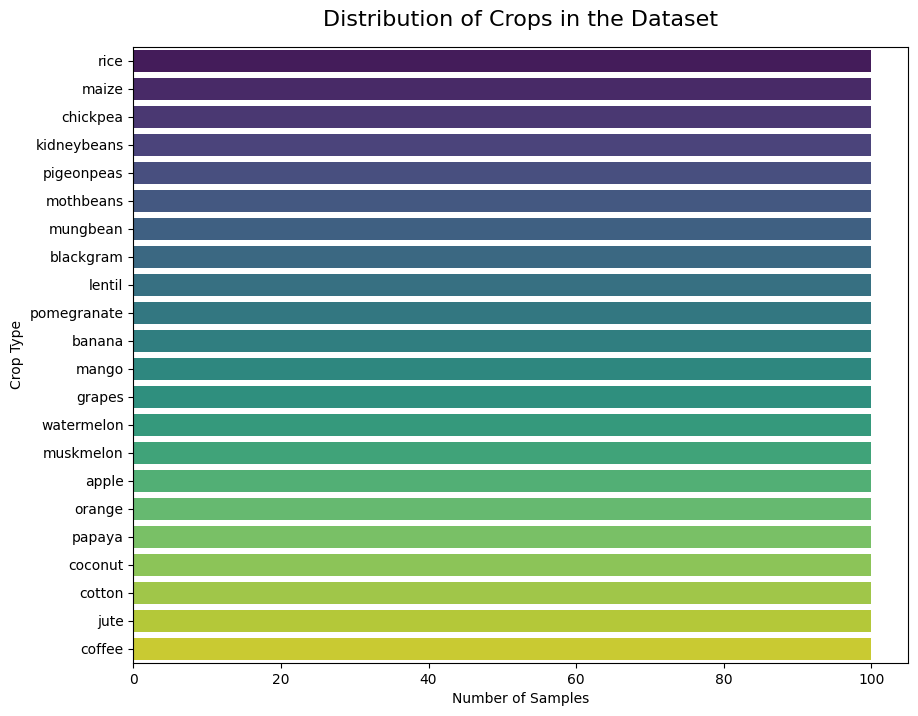

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(y='label', data=crop, order=crop['label'].value_counts().index, palette='viridis')
plt.title("Distribution of Crops in the Dataset", fontsize=16, pad=15)
plt.xlabel("Number of Samples")
plt.ylabel("Crop Type")
plt.show()


<Figure size 1200x600 with 0 Axes>

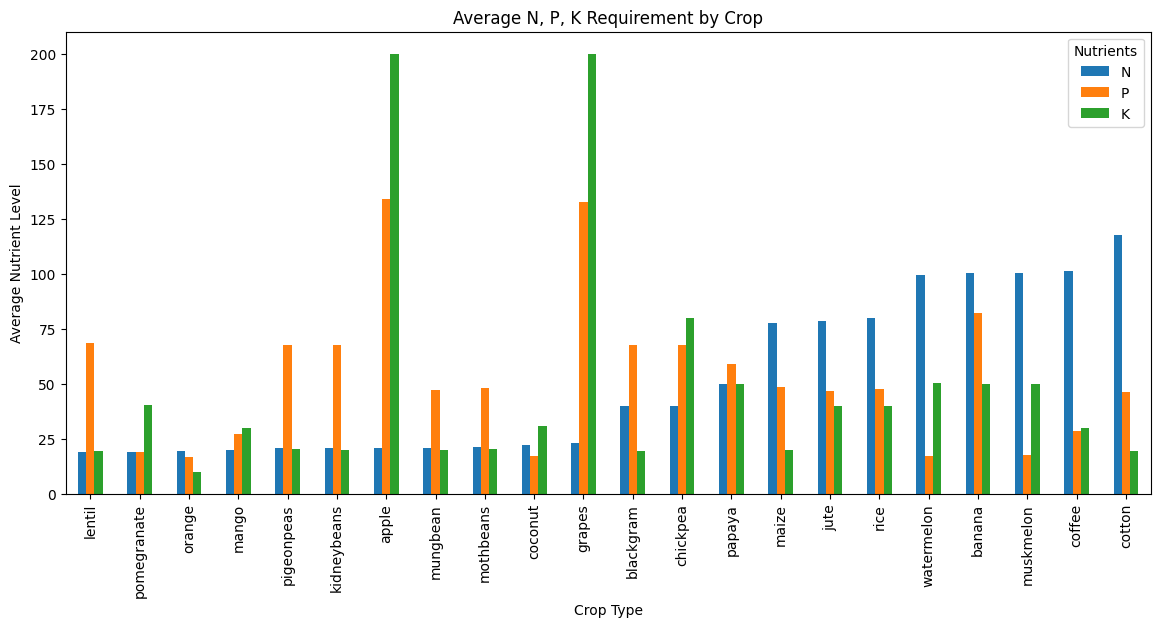

In [10]:
plt.figure(figsize=(12,6))
avg_nutrients = crop.groupby('label')[['N','P','K']].mean().sort_values('N')
avg_nutrients.plot(kind='bar', figsize=(14,6))
plt.title("Average N, P, K Requirement by Crop")
plt.ylabel("Average Nutrient Level")
plt.xlabel("Crop Type")
plt.xticks(rotation=90)
plt.legend(title="Nutrients")
plt.show()
#This tells you which crops need more Nitrogen (N), Phosphorus (P), or Potassium (K).

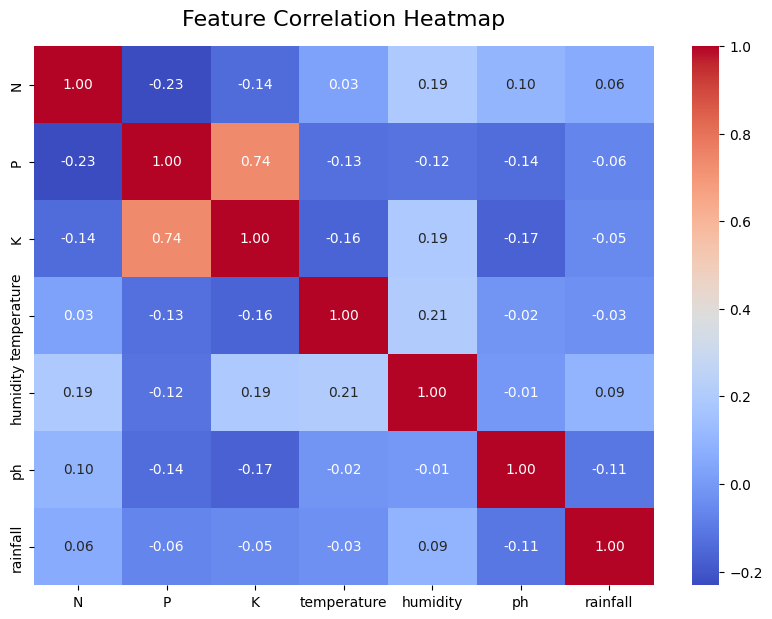

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(crop.drop(columns='label').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16, pad=15)
plt.show()


# **Encoding the labels**

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
crop['label_encoded'] = le.fit_transform(crop['label'])

In [13]:
y = crop['label_encoded']
X = crop.drop(['label', 'label_encoded'], axis=1)

In [14]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Feature scaling**

In [15]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# Predictions
predictions = model.predict(X_test)

In [18]:

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, predictions, target_names=le.classes_))


Model Accuracy: 99.32%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

In [19]:
import joblib
joblib.dump(model, 'crop_recommendation_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import joblib

# Load model and scaler
model = joblib.load('crop_recommendation_model.joblib')
scaler = joblib.load('scaler.joblib')

crop_labels = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton',
               'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans',
               'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate',
               'rice', 'watermelon']
N = widgets.IntSlider(value=50, min=0, max=140, description='N:', continuous_update=False)
P = widgets.IntSlider(value=50, min=0, max=145, description='P:', continuous_update=False)
K = widgets.IntSlider(value=50, min=0, max=205, description='K:', continuous_update=False)
temperature = widgets.FloatSlider(value=25, min=8.8, max=44, step=0.1, description='Temp (°C):', continuous_update=False)
humidity = widgets.FloatSlider(value=70, min=14, max=100, step=0.1, description='Humidity %:', continuous_update=False)
ph = widgets.FloatSlider(value=6.5, min=3.5, max=10, step=0.1, description='pH:', continuous_update=False)
rainfall = widgets.FloatSlider(value=100, min=20, max=300, step=1, description='Rainfall (mm):', continuous_update=False)

button = widgets.Button(description="Predict Crop")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        features = np.array([[N.value, P.value, K.value, temperature.value, humidity.value, ph.value, rainfall.value]])
        scaled_features = scaler.transform(features)
        prediction_idx = model.predict(scaled_features)[0]
        print("Recommended Crop:", crop_labels[prediction_idx])

button.on_click(on_button_clicked)

display(N, P, K, temperature, humidity, ph, rainfall, button, output)


IntSlider(value=50, continuous_update=False, description='N:', max=140)

IntSlider(value=50, continuous_update=False, description='P:', max=145)

IntSlider(value=50, continuous_update=False, description='K:', max=205)

FloatSlider(value=25.0, continuous_update=False, description='Temp (°C):', max=44.0, min=8.8)

FloatSlider(value=70.0, continuous_update=False, description='Humidity %:', min=14.0)

FloatSlider(value=6.5, continuous_update=False, description='pH:', max=10.0, min=3.5)

FloatSlider(value=100.0, continuous_update=False, description='Rainfall (mm):', max=300.0, min=20.0, step=1.0)

Button(description='Predict Crop', style=ButtonStyle())

Output()